In [39]:
from heatgeo.embedding import HeatGeo
import numpy as np
import scprep
import scanpy as sc
import pathlib
import re

In [7]:
import sys
import numpy as np
import phate
import graphtools as gt
import numpy as np
import pygsp
# from src.mds import embed_MDS
import scprep
from scipy.spatial.distance import jensenshannon
# sys.path.append('../../../HeatGeo/heatgeo/')
# from embedding import EmbJSD, Embheatgeo, EmbHeatPHATE, EmbCTD, EmbGraphMMD, EmbMarheatgeo, CraneEmb, HeatGeo
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import umap
from dotenv import load_dotenv
import os
import seaborn as sns
from sklearn.manifold import TSNE

In [8]:
# adata = sc.read('../../data/old/eb_hv.h5ad', backed='r')

In [26]:
data = np.load('../../data/eb_subset_all.npz')
X = data['data']
label = data['colors']

In [27]:
knn = 20
tau = 10
methods = {
    # "Heat-PHATE": EmbHeatPHATE(knn=knn, tau=tau, anisotropy=0, filter_method="mar"),
    "heatgeo": HeatGeo(knn=knn, tau=tau,filter_method="mar"),
    "heatgeo Harnack": HeatGeo(knn=knn, tau=tau, harnack_regul=1, filter_method="mar"),
    "heatgeo Denoise": HeatGeo(knn=knn, tau=tau, denoising=True, denoise_regul=1, filter_method="mar"),
}

In [29]:
embedding = {}
n = len(methods)
for name, emb_op in methods.items():
    print(name)
    emb = emb_op.fit_transform(X)
    embedding[name] = emb

heatgeo
Using s_gd2 for MDS. None
heatgeo Harnack
Using s_gd2 for MDS. None
heatgeo Denoise
Using s_gd2 for MDS. None


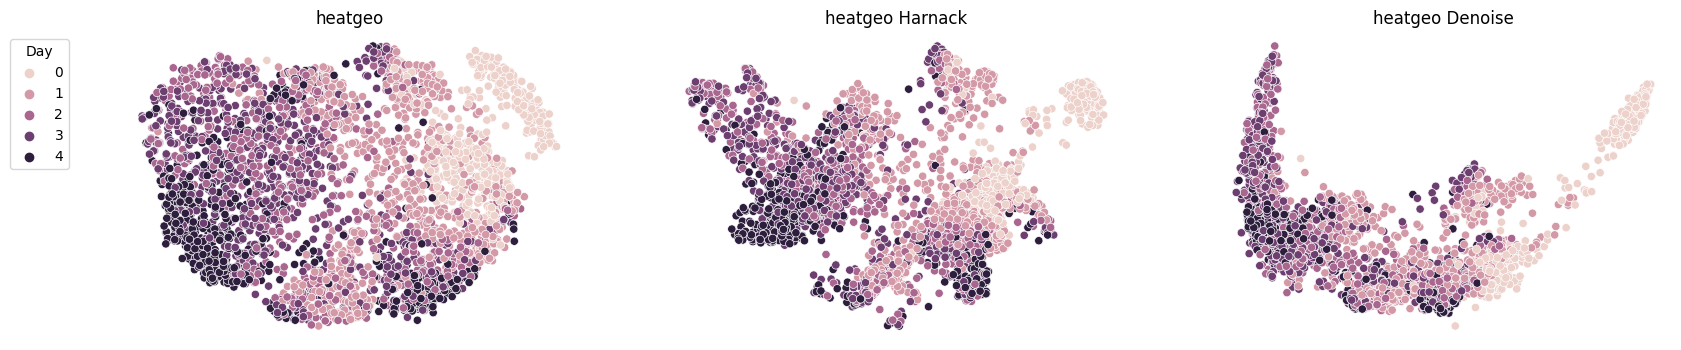

In [31]:
n = len(methods)
fig = plt.figure(figsize=(20, 4))
for i, (name,_) in enumerate(methods.items()):
    ax = fig.add_subplot(1, n, i+1)
    sns.scatterplot(x=embedding[name][:,0], y=embedding[name][:,1], hue=label, ax=ax)
    ax.set_title(name)
    ax.axis("off")
    ax.legend(title="Day", bbox_to_anchor=(-0.1, 1.0))
    if i>0:
        ax.get_legend().remove()
# fig.savefig("eb_all_emb.png", bbox_inches="tight")

In [36]:
emb_op.dist

array([[  0.        ,  14.16912967,  61.34481824, ...,  40.45182519,
        231.56155344, 102.14195344],
       [ 14.16912967,   0.        ,  64.16550444, ...,  35.45287328,
        229.23900678,  99.81609073],
       [ 61.34481824,  64.16550444,   0.        , ...,  80.20344932,
        230.82744774,  88.12685723],
       ...,
       [ 40.45182519,  35.45287328,  80.20344932, ...,   0.        ,
        239.9649048 , 112.23685997],
       [231.56155344, 229.23900678, 230.82744774, ..., 239.9649048 ,
          0.        , 181.92894104],
       [102.14195344,  99.81609073,  88.12685723, ..., 112.23685997,
        181.92894104,   0.        ]])

In [32]:
knn = 20
tau = 10
methods_train = {
    # "Heat-PHATE": EmbHeatPHATE(knn=knn, tau=tau, anisotropy=0, filter_method="mar"),
    "heatgeo": HeatGeo(knn=knn, tau=tau,filter_method="mar"),
    "heatgeo Harnack": HeatGeo(knn=knn, tau=tau, harnack_regul=1, filter_method="mar"),
    "heatgeo Denoise": HeatGeo(knn=knn, tau=tau, denoising=True, denoise_regul=1, filter_method="mar"),
}

In [33]:
embedding_train = {}
n = len(methods)
for name, emb_op in methods_train.items():
    print(name)
    emb = emb_op.fit_transform(X[data['is_train']])
    embedding_train[name] = emb

heatgeo
Using s_gd2 for MDS. None
heatgeo Harnack
Using s_gd2 for MDS. None
heatgeo Denoise
Using s_gd2 for MDS. None


In [41]:
datapath = '../../data/other_dist/'
pathlib.Path(datapath).mkdir(parents=True, exist_ok=True)

for name, emb_op in methods.items():
    is_train = data['is_train']
    phate = embedding[name]
    dists_all = emb_op.dist
    dists = dists_all.copy()
    dists_train = methods_train[name].dist
    dists[is_train][:,is_train] = dists_train
    data_dict = dict(
        data=data['data'],
        phate=phate,
        colors=data['colors'],
        is_train=is_train,
        dist=dists,
        dist_all=dists_all,
    )
    np.savez(f'{datapath}/EB_{name.replace(" ", "_")}.npz', **data_dict)

In [43]:
# taus=["auto", 5, 10, 50]
Denoise_reguls=[0.0, 0.5, 1.0]
harnack_reguls=[0.0, 0.75, 1.5]
# knns=[5,10,15]

heatgeo Harnack.75
Using s_gd2 for MDS. None
heatgeo Harnack1.5
Using s_gd2 for MDS. None
heatgeo Denoise.5
Using s_gd2 for MDS. None
heatgeo Harnack.75
Using s_gd2 for MDS. None
heatgeo Harnack1.5
Using s_gd2 for MDS. None
heatgeo Denoise.5
Using s_gd2 for MDS. None


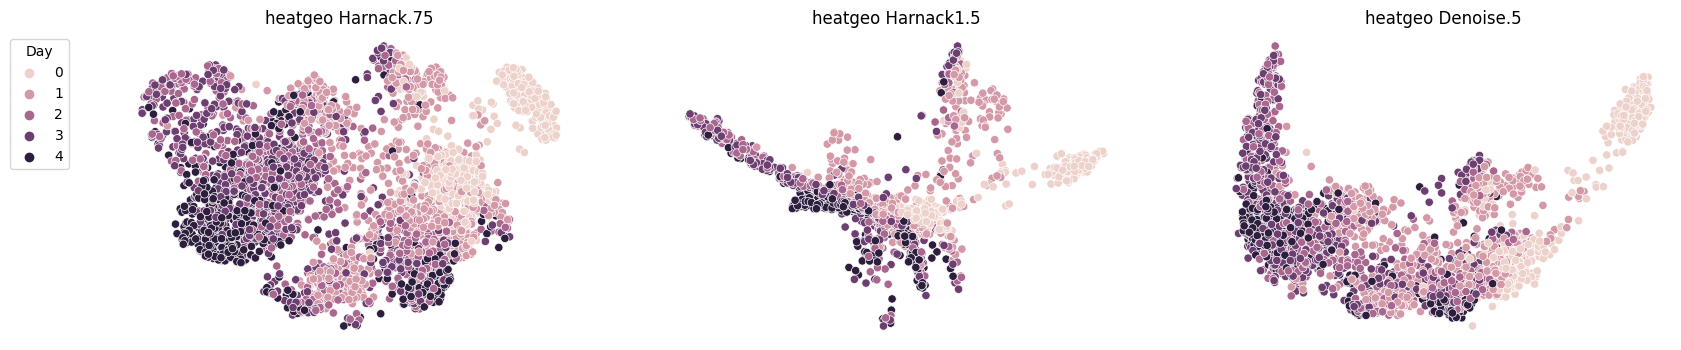

In [44]:
methods = {
    # "Heat-PHATE": EmbHeatPHATE(knn=knn, tau=tau, anisotropy=0, filter_method="mar"),
    # "heatgeo": HeatGeo(knn=knn, tau=tau,filter_method="mar"),
    "heatgeo Harnack.75": HeatGeo(knn=knn, tau=tau, harnack_regul=.75, filter_method="mar"),
    "heatgeo Harnack1.5": HeatGeo(knn=knn, tau=tau, harnack_regul=1.5, filter_method="mar"),
    "heatgeo Denoise.5": HeatGeo(knn=knn, tau=tau, denoising=True, denoise_regul=.5, filter_method="mar"),
}
embedding = {}
n = len(methods)
for name, emb_op in methods.items():
    print(name)
    emb = emb_op.fit_transform(X)
    embedding[name] = emb
n = len(methods)
fig = plt.figure(figsize=(20, 4))
for i, (name,_) in enumerate(methods.items()):
    ax = fig.add_subplot(1, n, i+1)
    sns.scatterplot(x=embedding[name][:,0], y=embedding[name][:,1], hue=label, ax=ax)
    ax.set_title(name)
    ax.axis("off")
    ax.legend(title="Day", bbox_to_anchor=(-0.1, 1.0))
    if i>0:
        ax.get_legend().remove()
# fig.savefig("eb_all_emb.png", bbox_inches="tight")
knn = 20
tau = 10
methods_train = {
    # "Heat-PHATE": EmbHeatPHATE(knn=knn, tau=tau, anisotropy=0, filter_method="mar"),
    # "heatgeo": HeatGeo(knn=knn, tau=tau,filter_method="mar"),
    "heatgeo Harnack.75": HeatGeo(knn=knn, tau=tau, harnack_regul=.75, filter_method="mar"),
    "heatgeo Harnack1.5": HeatGeo(knn=knn, tau=tau, harnack_regul=1.5, filter_method="mar"),
    "heatgeo Denoise.5": HeatGeo(knn=knn, tau=tau, denoising=True, denoise_regul=.5, filter_method="mar"),
}
embedding_train = {}
n = len(methods)
for name, emb_op in methods_train.items():
    print(name)
    emb = emb_op.fit_transform(X[data['is_train']])
    embedding_train[name] = emb
datapath = '../../data/other_dist/'
pathlib.Path(datapath).mkdir(parents=True, exist_ok=True)

for name, emb_op in methods.items():
    is_train = data['is_train']
    phate = embedding[name]
    dists_all = emb_op.dist
    dists = dists_all.copy()
    dists_train = methods_train[name].dist
    dists[is_train][:,is_train] = dists_train
    data_dict = dict(
        data=data['data'],
        phate=phate,
        colors=data['colors'],
        is_train=is_train,
        dist=dists,
        dist_all=dists_all,
    )
    np.savez(f'{datapath}/EB_{name.replace(" ", "_")}.npz', **data_dict)